## Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

## Data Preparation

### Data Loading

In [2]:
data = pd.DataFrame(pd.read_csv('Leads.csv'))
data.head() 

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Data Inspection

In [3]:
data.shape

(9240, 37)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Cleaning

In [11]:
df = data

In [12]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
# Converting 'Select' values to NaN.
data = data.replace('Select', np.nan)

In [7]:
# Percentage of missing values by each column/feature
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [ ]:
# Skewed Data ( if more than 80% of a column is occupied by a single category, we can say that data is highly skewed )
#                      & solution of skewed data is to remove skewed data the column


# Intutions building ( telling the relation between the columns by the scatterplots ) 


# COMMON SENSE IN UNDERSTANDING THE DATA 


# Mean & median concept in replacing the missing values & outliers in the numerical columns 

# Mode value importance in replacing the missing values in object/categorical columns 

# value_counts() syntax

#### Process to replace/impute the missing values
For Numerical columns
-- make sure about outliers-------
-- If outliers are present, replace the missing values with the median
-- If data is free from outliers, replace the missing values with the mean of the particular column

In [20]:
df["Page Views Per Visit"].isnull().sum()

137

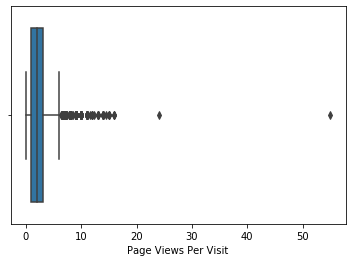

In [21]:
sns.boxplot(df["Page Views Per Visit"])

In [26]:
df['Page Views Per Visit'] = df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].mean(), inplace = True)

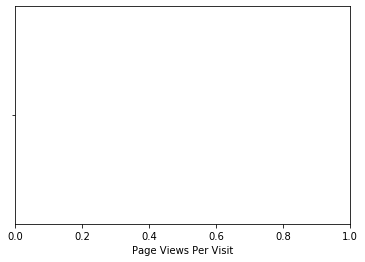

In [27]:
sns.boxplot(df['Page Views Per Visit'])

In [16]:
df.isnull().sum()/len(df)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

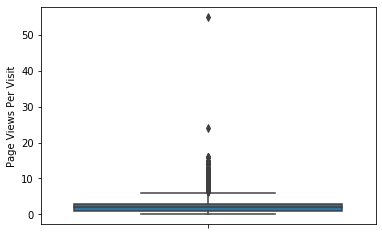

In [18]:
sns.boxplot(y = df['Page Views Per Visit'])

In [8]:
# Dropping the columns having more than missing values.
data = data.drop(data.loc[:,list(round(100*(data.isnull().sum()/len(data.index)), 2)>70)].columns, 1)

In [9]:
data['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

Text(0.5, 0, 'Lea Quality')

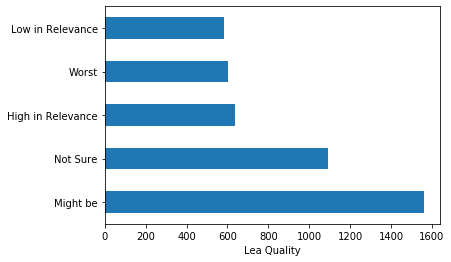

In [10]:
data['Lead Quality'].value_counts().plot.barh()
plt.xlabel("Lea Quality")

In [11]:
# As Lead quality is based on the feedback on worker, hence the value NA can be replaced with "Neutral"
data['Lead Quality'] = data['Lead Quality'].replace(np.nan, 'Neutral')

Text(0.5, 0, 'Lead Quality')

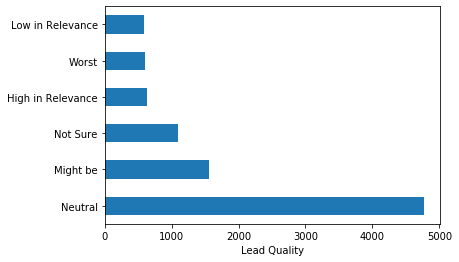

In [12]:
data['Lead Quality'].value_counts().plot.barh()
plt.xlabel("Lead Quality")

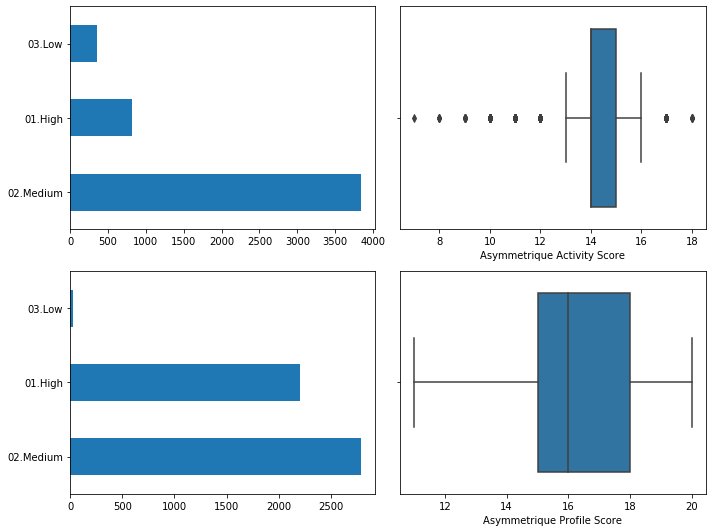

In [13]:
# summarising the Asymmetrique columns in the dataframe
fig, axs = plt.subplots(2,2, figsize = (10,7.5))
plt1 = data['Asymmetrique Activity Index'].value_counts().plot.barh(ax = axs[0,0])
plt2 = sns.boxplot(data['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = data['Asymmetrique Profile Index'].value_counts().plot.barh(ax = axs[1,0])
plt4 = sns.boxplot(data['Asymmetrique Profile Score'], ax = axs[1,1])
plt.tight_layout()

In [14]:
# Dropping the Asymmetrique columns because of less significance and more missing values
data = data.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

In [15]:
# City

In [16]:
data.City.value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

Text(0.5, 1.0, 'City')

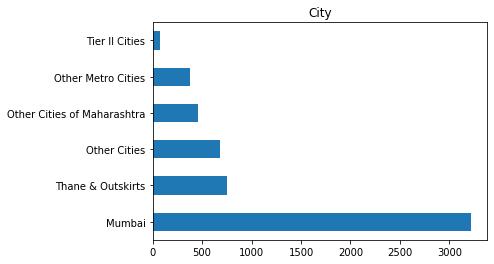

In [17]:
data['City'].value_counts().plot.barh()
plt.title("City")

In [18]:
# Imputing missing values in City with its mode value
mode_value = data['City'].mode()[0]
data['City'] = data['City'].replace(np.nan, mode_value)

In [19]:
# Specailization

In [20]:
data['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

Text(0.5, 1.0, 'Specialization')

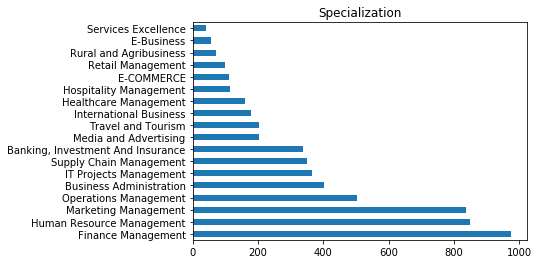

In [21]:
data['Specialization'].value_counts().plot.barh()
plt.title("Specialization")

In [22]:
# Replacing the missing values in the Specialization column with Others to avoid mis-intrepretation
data['Specialization'] = data['Specialization'].replace(np.nan, 'Others')

In [23]:
# Tags

In [24]:
data['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

Text(0.5, 1.0, 'Tags')

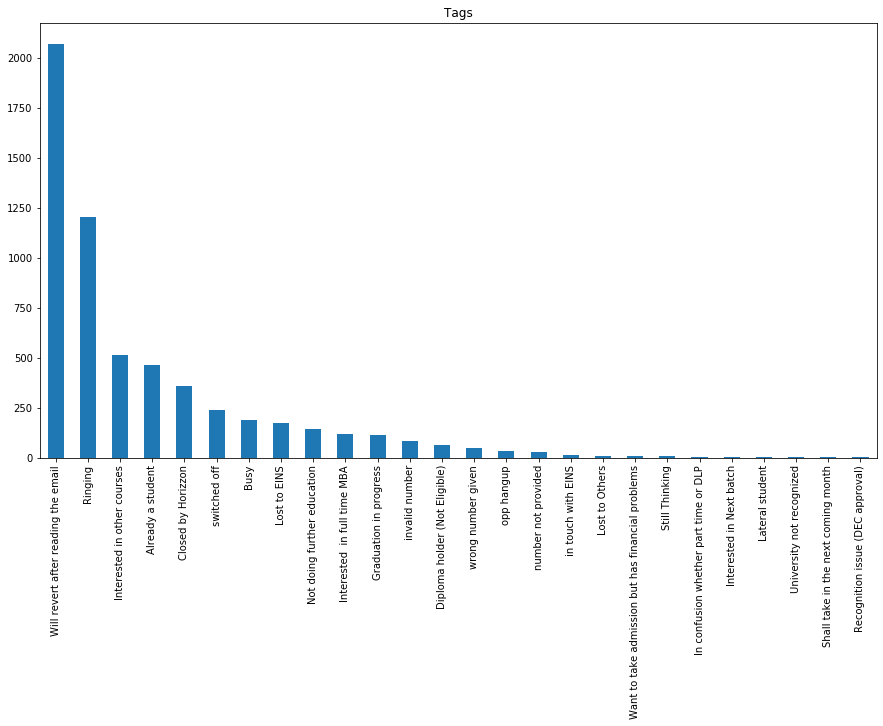

In [25]:
data['Tags'].value_counts().plot.bar(figsize = (15,8))
plt.title("Tags")

In [26]:
# Imputing the missing values in the Tags column with its mode value
data['Tags'] = data['Tags'].replace(np.nan, data['Tags'].mode()[0])

In [27]:
# What matters most to you in choosing a course

In [28]:
data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [29]:
# Imputing the missing values with mode
data['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].replace(np.nan, data['What matters most to you in choosing a course'].mode()[0])

In [30]:
# Occupation

In [31]:
data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [32]:
# Imputing with mode
data['What is your current occupation'] = data['What is your current occupation'].replace(np.nan, data['What is your current occupation'].mode()[0])

In [33]:
# Country

In [34]:
# Imputing with the respective mode
data['Country'] = data['Country'].replace(np.nan, data['Country'].mode()[0])

In [35]:
# Dropping the rest of the missing values, since very less are remaining
data.dropna(inplace = True)

In [36]:
# Checking the final missing value count
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

## Exploratory Data Analytics

### Univariate Analysis

#### Converted

In [37]:
# Converted is the target variabl.

In [38]:
Converted = (sum(data['Converted'])/len(data['Converted'].index))*100
Converted

37.85541106458012

#### Lead Origin

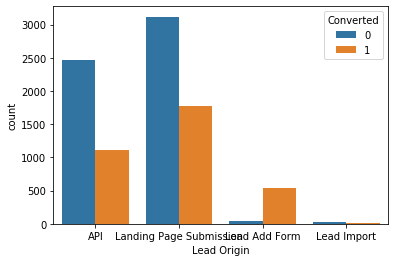

In [39]:
sns.countplot(x = "Lead Origin", hue = "Converted", data = data)

##### Inference
1. API and Landing Page Submission have 30-35% conversion rate.
2. Lead Add Form has more than 90% conversion rate but count of lead are not very high.

#### Lead Source

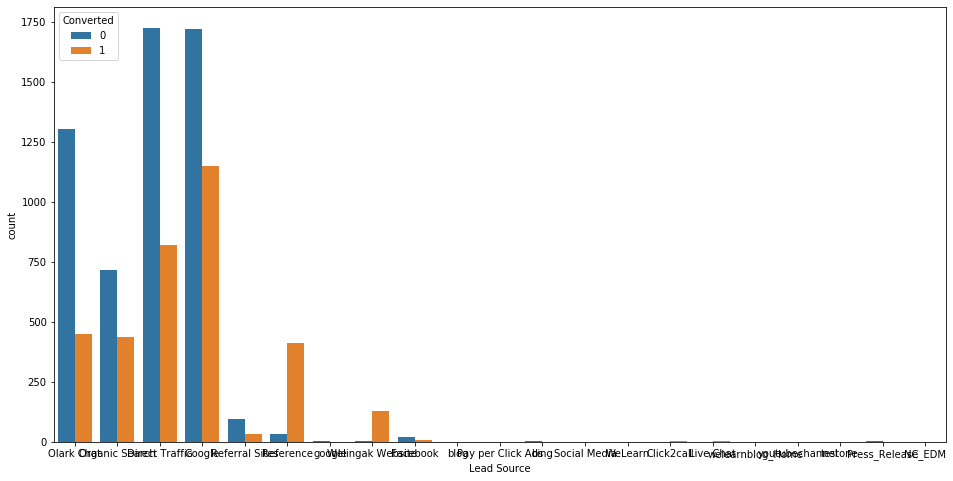

In [40]:
fig, axs = plt.subplots(figsize = (16, 8))
sns.countplot(x = "Lead Source", hue = "Converted", data = data)

In [41]:
# Since the attribute google is repeated Google, replacing it can be useful
data['Lead Source'] = data['Lead Source'].replace(['google'], 'Google')
# The feature is spread with little percentage of various value and combining them into another individual
# variable will be useful for modelling
data['Lead Source'] = data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

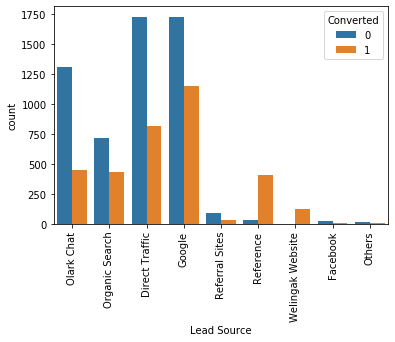

In [42]:
sns.countplot(x = "Lead Source", hue = "Converted", data = data)
xticks(rotation = 90)

##### Inference
1. Google and Direct traffic generates maximum number of leads.
2. Conversion Rate of reference leads and leads through welingak website is high.

#### Do Not Email & Do Not Call

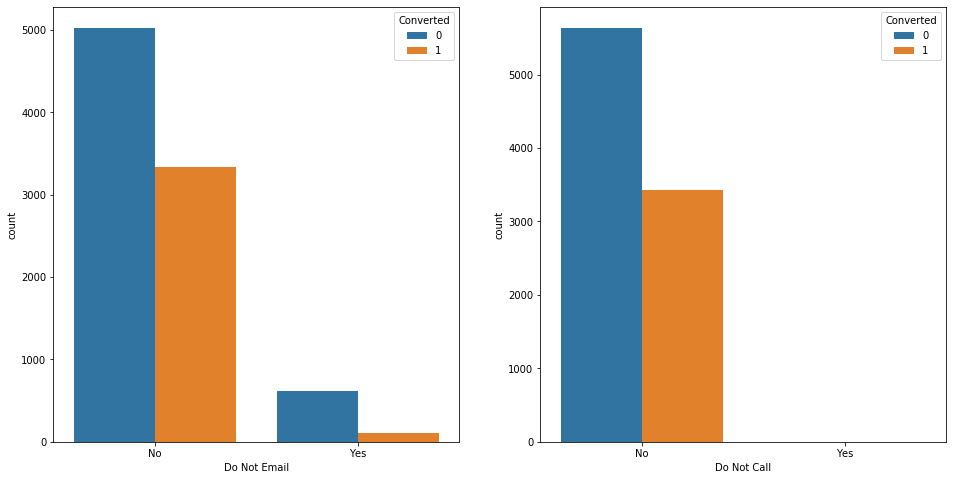

In [43]:
fig, axs = plt.subplots(1,2,figsize = (16,8))
sns.countplot(x = "Do Not Email", hue = "Converted", data = data, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = data, ax = axs[1])

#### Total Visits

In [44]:
data['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

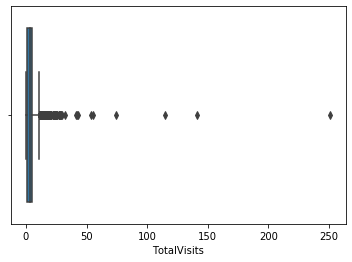

In [45]:
sns.boxplot(data['TotalVisits'])

In [46]:
import warnings
warnings.filterwarnings("ignore")

In [47]:
# Outlier treatment by caping technique
percentiles = data['TotalVisits'].quantile([0.05,0.95]).values
data['TotalVisits'][data['TotalVisits'] <= percentiles[0]] = percentiles[0]
data['TotalVisits'][data['TotalVisits'] >= percentiles[1]] = percentiles[1]

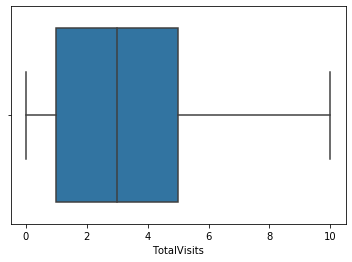

In [48]:
sns.boxplot(data['TotalVisits'])

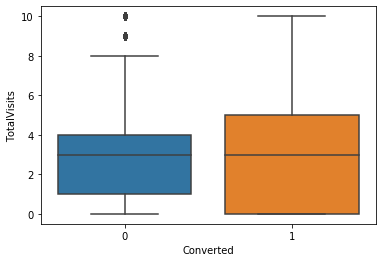

In [49]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = data)

#### Total time spent on website

In [50]:
data['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

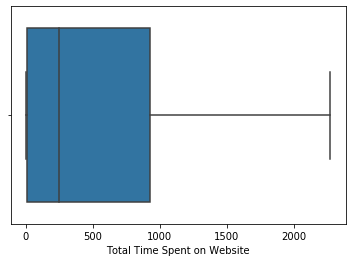

In [51]:
sns.boxplot(data['Total Time Spent on Website'])

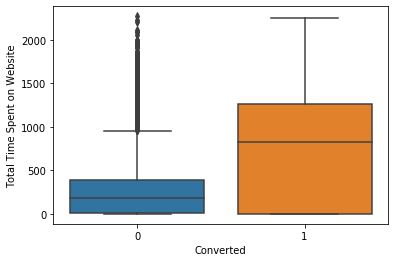

In [52]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = data)

#### Inference
1. Leads spending more time on the weblise are more likely to be converted.

### Page views per visit

In [53]:
data['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

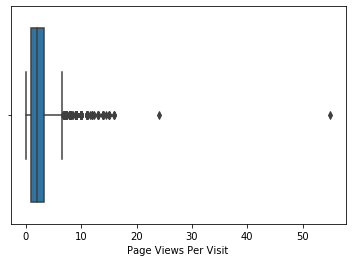

In [54]:
sns.boxplot(data['Page Views Per Visit'])

In [55]:
# Outliers are treated by caping technique
percentiles = data['Page Views Per Visit'].quantile([0.05,0.95]).values
data['Page Views Per Visit'][data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
data['Page Views Per Visit'][data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

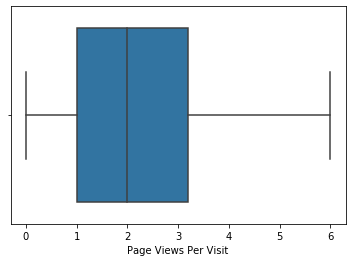

In [56]:
sns.boxplot(data['Page Views Per Visit'])

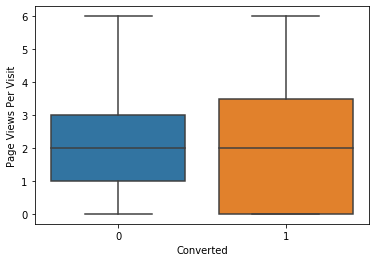

In [57]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = data)

#### Last Activity

In [58]:
data['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

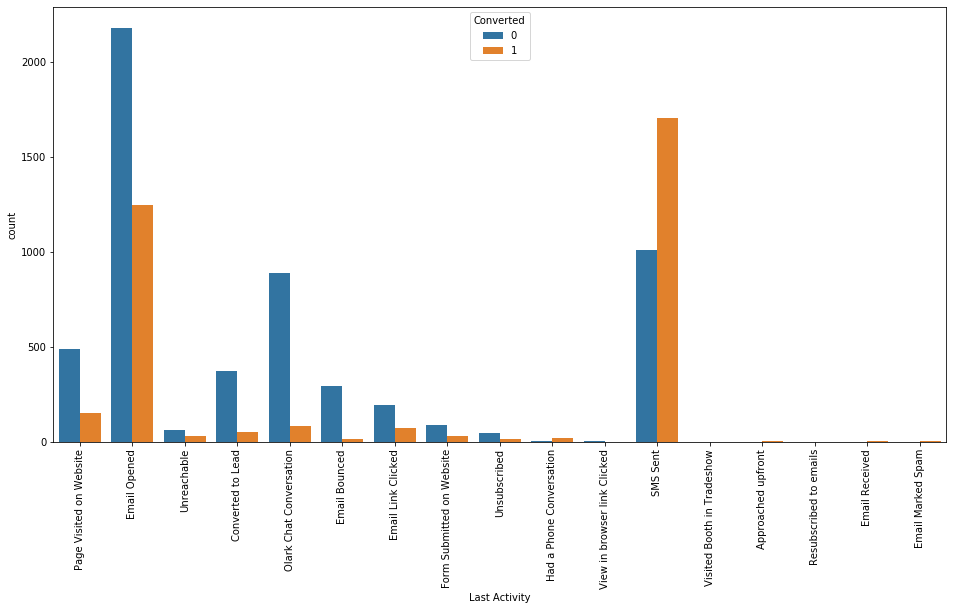

In [59]:
fig, axs = plt.subplots(figsize = (16,8))
sns.countplot(x = "Last Activity", hue = "Converted", data = data)
xticks(rotation = 90)

In [60]:
# There are more number of small activites attributes, so combining all into other would be helpful
data['Last Activity'] = data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

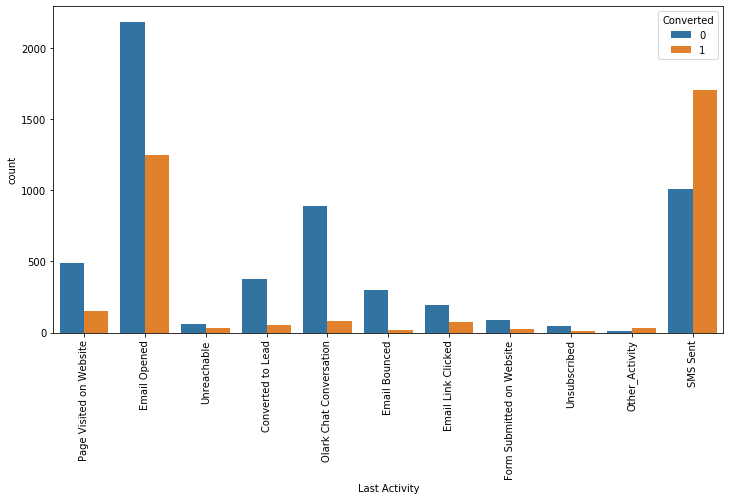

In [61]:
fig, axs = plt.subplots(figsize = (12,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = data)
xticks(rotation = 90)

#### Inference
1. Most of the lead have their Email opened as their last activity.
2. Conversion rate for leads with last activity as SMS Sent is almost 60%.b

#### Country

In [62]:
data.Country.value_counts()

India                   8787
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Germany                    4
Kuwait                     4
Canada                     4
South Africa               4
Nigeria                    4
Sweden                     3
Belgium                    2
Bangladesh                 2
Ghana                      2
Netherlands                2
Philippines                2
China                      2
Uganda                     2
Italy                      2
Asia/Pacific Region        2
Indonesia                  1
Russia                     1
Liberia                    1
Kenya                      1
Tanzania                   1
Vietnam                    1
Denmark       

#### Inference
Indians are more likely to be the one to select the course

#### Specialization

In [63]:
data.Specialization.value_counts()

Others                               3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [64]:
data['Specialization'] = data['Specialization'].replace(['Others'], 'Other_Specialization')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text xticklabel objects>)

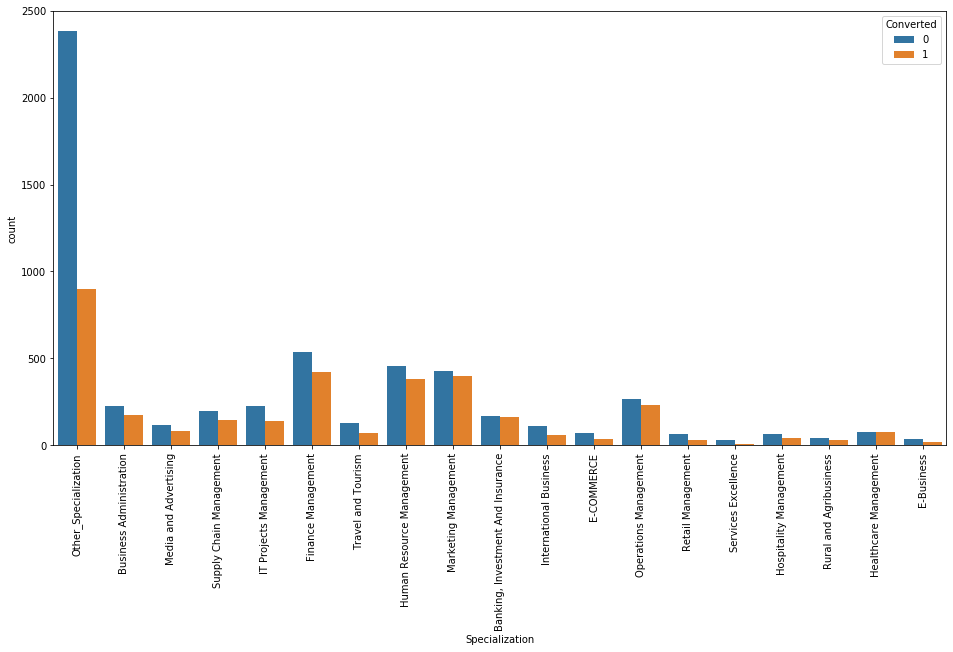

In [65]:
fig, axs = plt.subplots(figsize = (16,8))
sns.countplot(x = "Specialization", hue = "Converted", data = data)
xticks(rotation = 90)

#### Occupation

In [66]:
data['What is your current occupation'].value_counts()

Unemployed              8159
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

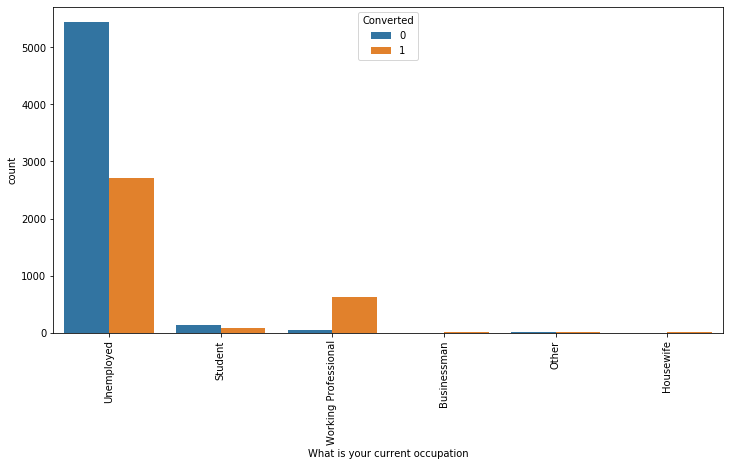

In [67]:
fig, axs = plt.subplots(figsize = (12,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = data)
xticks(rotation = 90)

#### Inference
1. Unemployed leads are the most in numbers but has around 30-35% conversion rate.

#### What matters most to you in choosing a course

In [68]:
data['What matters most to you in choosing a course'].value_counts()


Better Career Prospects      9072
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### Search

In [69]:
data.Search.value_counts()

No     9060
Yes      14
Name: Search, dtype: int64

#### Magazine

In [70]:
data.Magazine.value_counts()

No    9074
Name: Magazine, dtype: int64

#### Newspaper Article

In [71]:
data['Newspaper Article'].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

#### X Education Forums

In [72]:
data['X Education Forums'].value_counts()

No     9073
Yes       1
Name: X Education Forums, dtype: int64

#### Newspaper

In [73]:
data['Newspaper'].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

#### Digital Advertisement

In [74]:
data['Digital Advertisement'].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

#### Through Recommendations

In [75]:
data['Through Recommendations'].value_counts()

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

#### Receive More Updates About Our Courses

In [76]:
data['Receive More Updates About Our Courses'].value_counts()

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

#### Tags

In [77]:
data.Tags.value_counts()

Will revert after reading the email                  5343
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to Others

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

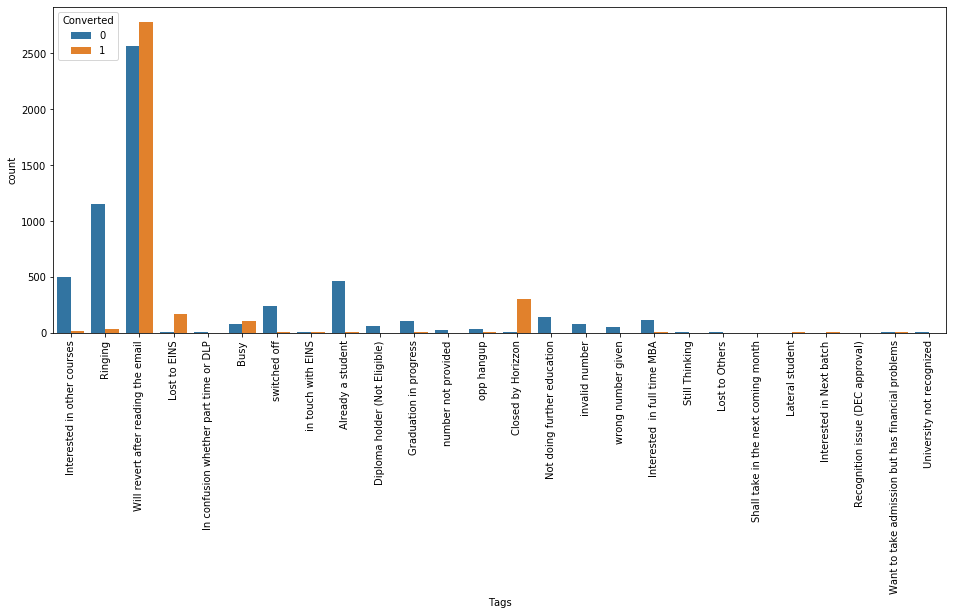

In [78]:
fig, axs = plt.subplots(figsize = (16,6))
sns.countplot(x = "Tags", hue = "Converted", data = data)
xticks(rotation = 90)

In [79]:
# Let's blend last activities as such and club all others to "Other_Activity"
data['Tags'] = data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

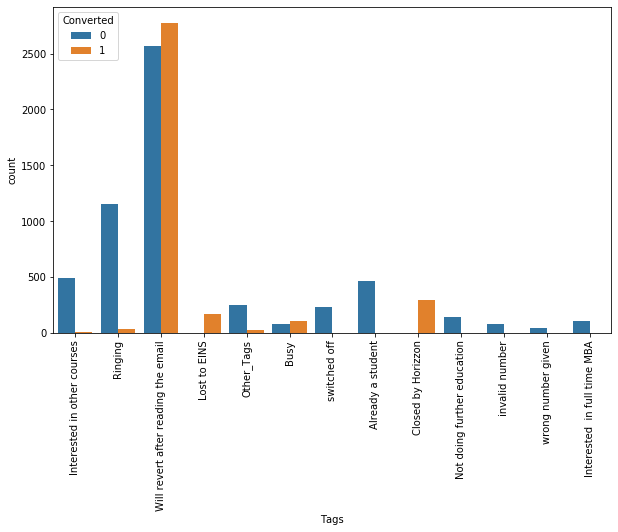

In [80]:
fig, axs = plt.subplots(figsize = (10,6))
sns.countplot(x = "Tags", hue = "Converted", data = data)
xticks(rotation = 90)

#### Lead Quality

In [81]:
data['Lead Quality'].value_counts()

Neutral              4720
Might be             1519
Not Sure             1086
Worst                 601
High in Relevance     592
Low in Relevance      556
Name: Lead Quality, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

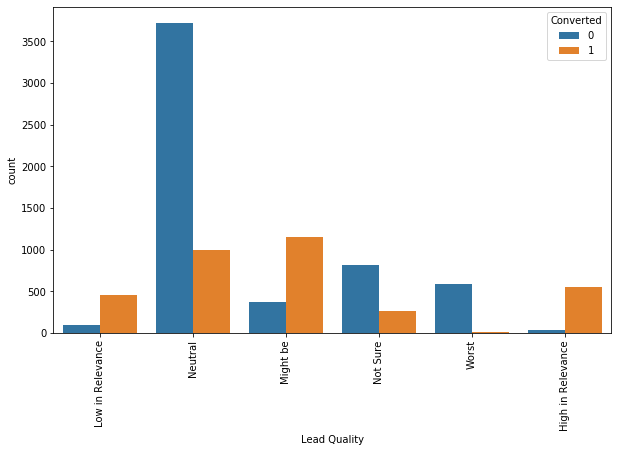

In [82]:
fig, axs = plt.subplots(figsize = (10,6))
sns.countplot(x = "Lead Quality", hue = "Converted", data = data)
xticks(rotation = 90)

#### Update me on Supply Chain Content

In [83]:
data['Update me on Supply Chain Content'].value_counts()

No    9074
Name: Update me on Supply Chain Content, dtype: int64

#### Get updates on DM Content

In [84]:
data['Get updates on DM Content'].value_counts()

No    9074
Name: Get updates on DM Content, dtype: int64

#### I agree to pay the amount through cheque

In [85]:
data['I agree to pay the amount through cheque'].value_counts()

No    9074
Name: I agree to pay the amount through cheque, dtype: int64

#### A free copy of Mastering The Interview

In [86]:
data['A free copy of Mastering The Interview'].value_counts()

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

#### City

In [87]:
data.City.value_counts()

Mumbai                         6752
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

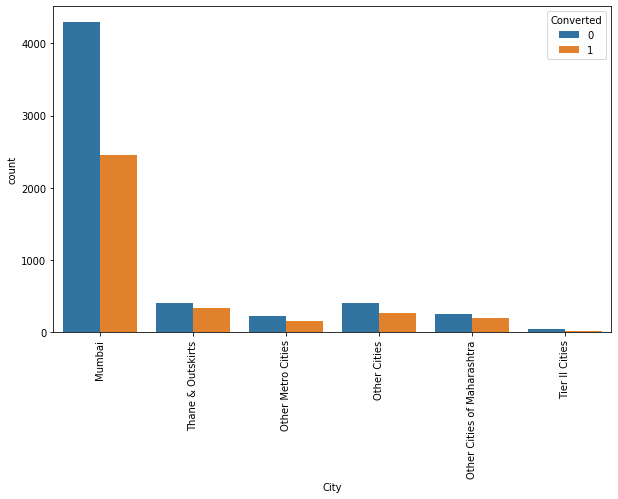

In [88]:
fig, axs = plt.subplots(figsize = (10,6))
sns.countplot(x = "City", hue = "Converted", data = data)
xticks(rotation = 90)

#### Inference
-Most leads are from mumbai.

#### Last Notable Activity

In [89]:
data['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
Email Received                     1
Form Submitted on Website          1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

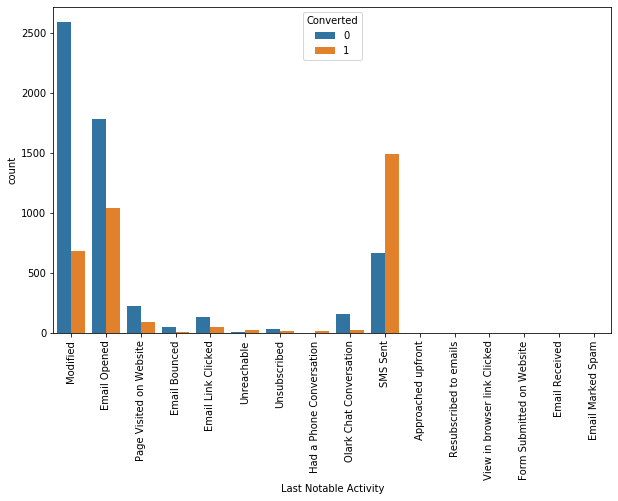

In [90]:
fig, axs = plt.subplots(figsize = (10,6))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = data)
xticks(rotation = 90)

In [91]:
# Dropping all the use less columns for our analysis and model building
data = data.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)

In [92]:
data.shape

(9074, 16)

#### Data Preparation

#### Mapping of Yes/No to 1/0

In [93]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
data[varlist] = data[varlist].apply(binary_map)

#### For categorical variables create dummy features 

In [94]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [95]:
# Adding the results to the master dataframe
data = pd.concat([data, dummy], axis=1)
data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [96]:
data = data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity'], axis = 1)

In [97]:
data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


#### Train Test Split

In [98]:
from sklearn.model_selection import train_test_split

X = data.drop(['Prospect ID','Converted'], axis=1)

In [99]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [100]:
# Putting response variable to y
y = data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [101]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Feature Scaling

In [102]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


#### Model Building step

In [103]:
import statsmodels.api as sm

In [104]:
# Logistic regression model wit the GLM class
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6264
Model Family:                Binomial   Df Model:                           86
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1155.4
Date:                Tue, 02 Jun 2020   Deviance:                       2310.9
Time:                        19:24:47   Pearson chi2:                 1.31e+05
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   21.6901   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Do Not Email                                            -1.3500      0.342     -3.943      0.000      -2.021      -0.679
Do Not Call                                             20.5135   1.48e+05      0.000      1.000    -2.9e+05     2.9e+05
TotalVisits                                              0.2512      0.090      2.777      0.005       0.074       0.429
Total Time Spent on Website                              1.1397      0.066     17.270      0.000       1.010       1.269
Page Views Per Visit                                    -0.3536      0.104     -3.407      0.001      -0.557      -0.150
Lead Origin_Landing Page Submission                     -1.0145      0.239     -4.251      0.000      -1.482      -0.547
Lead Origin_Lead Add Form                               -1.0894      1.675     -0.651      0.515      -4.372       2.193
Lead Origin_Lead Import                                 27.5593   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Facebook                                   -26.4032   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                                       0.2369      0.162      1.462      0.144      -0.081       0.554
Lead Source_Olark Chat                                   0.9841      0.244      4.025      0.000       0.505       1.463
Lead Source_Organic Search                               0.0738      0.221      0.334      0.738      -0.359       0.507
Lead Source_Others                                       0.8902      0.855      1.042      0.298      -0.785       2.565
Lead Source_Reference                                    2.5100      1.735      1.447      0.148      -0.890       5.910
Lead Source_Referral Sites                              -0.0080      0.500     -0.016      0.987      -0.988       0.972
Lead Source_Welingak Website                             6.2895      1.833      3.431      0.001       2.697       9.882
Last Activity_Email Bounced                             -0.2065      0.883     -0.234      0.815      -1.938       1.525
Last Activity_Email Link Clicked                         0.8169      0.688      1.187      0.235      -0.532       2.165
Last Activity_Email Opened                               0.1067      0.417      0.256      0.798      -0.710       0.923
Last Activity_Form Submitted on Website                 -0.1645      0.631     -0.261      0.794      -1.401       1.072
Last Activity_Olark Chat Conversation                   -0.4951      0.424     -1.168      0.243      -1.326       0.336
Last Activity_Other_Activity                             1

#### Automated RFE to select top features

In [105]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [106]:
rfe.support_

array([ True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False,  True,  True,  True,  True,  True, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False])

In [107]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 68),
 ('TotalVisits', False, 37),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 36),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 12),
 ('Lead Source_Facebook', False, 72),
 ('Lead Source_Google', False, 47),
 ('Lead Source_Olark Chat', False, 2),
 ('Lead Source_Organic Search', False, 63),
 ('Lead Source_Others', False, 42),
 ('Lead Source_Reference', False, 70),
 ('Lead Source_Referral Sites', False, 56),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 50),
 ('Last Activity_Email Link Clicked', False, 38),
 ('Last Activity_Email Opened', False, 40),
 ('Last Activity_Form Submitted on Website', False, 52),
 ('Last Activity_Olark Chat Conversation', False, 9),
 ('Last Activity_Other_Activity', False, 11),
 ('Last Activity_Page Visited on Website', False, 39),
 ('Last Activity_SMS Sent'

In [108]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given', 'Lead Quality_Neutral',
       'Lead Quality_Worst', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [109]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resou

In [110]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1430.4
Date:                Tue, 02 Jun 2020   Deviance:                       2860.8
Time:                        19:25:06   Pearson chi2:                 1.86e+05
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.3020      0.148     -8.826      0.000      -1.591      -1.013
Do Not Email                                     -1.2291      0.233     -5.282      0.000      -1.685      -0.773
Lead Origin_Lead Add Form                         0.7361      0.418      1.759      0.079      -0.084       1.556
Lead Source_Welingak Website                      3.6047      0.846      4.259      0.000       1.946       5.263
Last Activity_SMS Sent                            2.0363      0.107     19.075      0.000       1.827       2.246
Tags_Closed by Horizzon                           9.3732      0.779     12.032      0.000       7.846      10.900
Tags_Lost to EINS                                10.1613      0.768     13.233      0.000       8.656      11.666
Tags_Ringing                                     -2.9170      0.276    -10.579      0.000      -3.457      -2.377
Tags_Will revert after reading the email          4.4197      0.200     22.085      0.000       4.027       4.812
Tags_invalid number                             -23.9006   2.15e+04     -0.001      0.999   -4.21e+04     4.2e+04
Tags_switched off                                -3.1955      0.538     -5.937      0.000      -4.250      -2.141
Tags_wrong number given                         -24.2805   3.07e+04     -0.001      0.999   -6.02e+04    6.01e+04
Lead Quality_Neutral                             -4.2200      0.157    -26.812      0.000      -4.528      -3.912
Lead Quality_Worst                               -3.7720      0.887     -4.250      0.000      -5.511      -2.033
Last Notable Activity_Modified                   -1.7985      0.115    -15.632      0.000      -2.024      -1.573
Last Notable Activity_Olark Chat Conversation    -1.1843      0.367     -3.223      0.001      -1.905      -0.464
=================================================================================================================
"""

In [111]:
# Dropping the column Tags_invalid_number
col1 = col.drop('Tags_invalid number',1)

In [112]:
col1

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Neutral', 'Lead Quality_Worst',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [113]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1441.1
Date:                Tue, 02 Jun 2020   Deviance:                       2882.1
Time:                        19:25:07   Pearson chi2:                 1.77e+05
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.4175      0.147     -9.656      0.000      -1.705      -1.130
Do Not Email                                     -1.2316      0.232     -5.320      0.000      -1.685      -0.778
Lead Origin_Lead Add Form                         0.7721      0.420      1.838      0.066      -0.051       1.596
Lead Source_Welingak Website                      3.5663      0.847      4.212      0.000       1.907       5.226
Last Activity_SMS Sent                            2.0042      0.106     18.904      0.000       1.796       2.212
Tags_Closed by Horizzon                           9.4590      0.779     12.145      0.000       7.933      10.986
Tags_Lost to EINS                                10.2566      0.768     13.357      0.000       8.752      11.762
Tags_Ringing                                     -2.7742      0.274    -10.134      0.000      -3.311      -2.238
Tags_Will revert after reading the email          4.5306      0.200     22.708      0.000       4.140       4.922
Tags_switched off                                -3.0512      0.537     -5.681      0.000      -4.104      -1.999
Tags_wrong number given                         -22.1392   1.13e+04     -0.002      0.998   -2.22e+04    2.21e+04
Lead Quality_Neutral                             -4.2089      0.157    -26.829      0.000      -4.516      -3.901
Lead Quality_Worst                               -3.8234      0.883     -4.329      0.000      -5.554      -2.093
Last Notable Activity_Modified                   -1.7799      0.115    -15.511      0.000      -2.005      -1.555
Last Notable Activity_Olark Chat Conversation    -1.1862      0.367     -3.229      0.001      -1.906      -0.466
=================================================================================================================
"""

In [114]:
# Dropping Tags_wrong number given
col2 = col1.drop('Tags_wrong number given',1)

In [115]:
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1448.4
Date:                Tue, 02 Jun 2020   Deviance:                       2896.8
Time:                        19:25:07   Pearson chi2:                 1.74e+05
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.5024      0.146    -10.287      0.000      -1.789      -1.216
Do Not Email                                     -1.2512      0.230     -5.431      0.000      -1.703      -0.800
Lead Origin_Lead Add Form                         0.7988      0.422      1.895      0.058      -0.028       1.625
Lead Source_Welingak Website                      3.5410      0.847      4.179      0.000       1.880       5.202
Last Activity_SMS Sent                            1.9870      0.106     18.806      0.000       1.780       2.194
Tags_Closed by Horizzon                           9.5258      0.779     12.231      0.000       7.999      11.052
Tags_Lost to EINS                                10.3265      0.768     13.445      0.000       8.821      11.832
Tags_Ringing                                     -2.6742      0.272     -9.817      0.000      -3.208      -2.140
Tags_Will revert after reading the email          4.6123      0.199     23.165      0.000       4.222       5.003
Tags_switched off                                -2.9497      0.536     -5.499      0.000      -4.001      -1.898
Lead Quality_Neutral                             -4.2010      0.157    -26.816      0.000      -4.508      -3.894
Lead Quality_Worst                               -3.7829      0.886     -4.268      0.000      -5.520      -2.046
Last Notable Activity_Modified                   -1.7705      0.115    -15.456      0.000      -1.995      -1.546
Last Notable Activity_Olark Chat Conversation    -1.1873      0.367     -3.233      0.001      -1.907      -0.468
=================================================================================================================
"""

In [116]:
# Predicting the values
y_train_pred = res.predict(X_train_sm)
y_train_pred[:5]

3009    0.251411
1012    0.087680
9226    0.018704
4750    0.710105
7987    0.999882
dtype: float64

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [117]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
3009,0,0.251411,3009
1012,0,0.087680,1012
9226,0,0.018704,9226
4750,1,0.710105,4750
7987,1,0.999882,7987


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [118]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
3009,0,0.251411,3009,0
1012,0,0.087680,1012,0
9226,0,0.018704,9226,0
4750,1,0.710105,4750,1
7987,1,0.999882,7987,1


In [119]:
# Confusion mastrix skeleton
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708  

In [120]:
from sklearn import metrics

# Creating the Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3745  160]
 [ 340 2106]]


In [121]:
#  accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9212722405920327


####  VIFs

In [122]:
# VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [123]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Tags_Will revert after reading the email,2.76
11,Last Notable Activity_Modified,2.50
3,Last Activity_SMS Sent,1.61
1,Lead Origin_Lead Add Form,1.57
2,Lead Source_Welingak Website,1.35
6,Tags_Ringing,1.29
4,Tags_Closed by Horizzon,1.17
0,Do Not Email,1.13
12,Last Notable Activity_Olark Chat Conversation,1.12
5,Tags_Lost to EINS,1.05


In [124]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [125]:
# sensitivity of model
TP / float(TP+FN)

0.8609975470155355

In [126]:
# specificity
TN / float(TN+FP)

0.9590268886043534

In [127]:
# false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.040973111395646605


In [128]:
# positive predictive value 
print (TP / float(TP+FP))

0.9293909973521624


In [129]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9167686658506732


####  ROC Curve

In [130]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [131]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

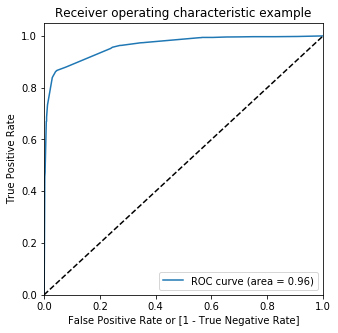

In [132]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### Finding Optimal Cutoff Point

In [133]:
 numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3009,0,0.251411,3009,0,1,1,1,0,0,0,0,0,0,0
1012,0,0.087680,1012,0,1,0,0,0,0,0,0,0,0,0
9226,0,0.018704,9226,0,1,0,0,0,0,0,0,0,0,0
4750,1,0.710105,4750,1,1,1,1,1,1,1,1,1,0,0
7987,1,0.999882,7987,1,1,1,1,1,1,1,1,1,1,1


In [134]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.385136     1.000000     0.000000
0.1   0.1  0.793891     0.968929     0.684251
0.2   0.2  0.832782     0.956255     0.755442
0.3   0.3  0.920485     0.866721     0.954161
0.4   0.4  0.921115     0.864677     0.956466
0.5   0.5  0.921272     0.860998     0.959027
0.6   0.6  0.921587     0.860998     0.959539
0.7   0.7  0.920013     0.839330     0.970551
0.8   0.8  0.873563     0.686018     0.991037
0.9   0.9  0.867895     0.669665     0.992061


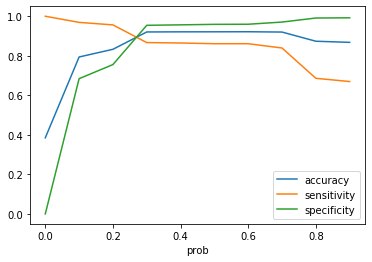

In [135]:
# Let's plot accuracy sensitivity and specificity
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

In [136]:
#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
3009,0,0.251411,3009,0,1,1,1,0,0,0,0,0,0,0,1
1012,0,0.087680,1012,0,1,0,0,0,0,0,0,0,0,0,0
9226,0,0.018704,9226,0,1,0,0,0,0,0,0,0,0,0,0
4750,1,0.710105,4750,1,1,1,1,1,1,1,1,1,0,0,1
7987,1,0.999882,7987,1,1,1,1,1,1,1,1,1,1,1,1


#### Assigning Lead Score

In [137]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
3009,0,0.251411,3009,0,1,1,1,0,0,0,0,0,0,0,1,25
1012,0,0.087680,1012,0,1,0,0,0,0,0,0,0,0,0,0,9
9226,0,0.018704,9226,0,1,0,0,0,0,0,0,0,0,0,0,2
4750,1,0.710105,4750,1,1,1,1,1,1,1,1,1,0,0,1,71
7987,1,0.999882,7987,1,1,1,1,1,1,1,1,1,1,1,1,100


In [138]:
# overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [139]:
# sensitivity of our model
TP / float(TP+FN)

0.9562551103843009

In [140]:
# specificity
TN / float(TN+FP)

0.7554417413572343

In [141]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.24455825864276567


In [142]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7100789313904068


In [143]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9649983644095519


#### Precision and Recall

In [144]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3745,  160],
       [ 340, 2106]], dtype=int64)

In [145]:
# Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9293909973521624

In [146]:
# Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8609975470155355

In [147]:
from sklearn.metrics import precision_score, recall_score

In [148]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)

0.9293909973521624

In [149]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8609975470155355

#### Precision and recall tradeoff

In [150]:
from sklearn.metrics import precision_recall_curve

In [151]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(3009    0
 1012    0
 9226    0
 4750    1
 7987    1
        ..
 367     0
 82      1
 8199    0
 7077    0
 5754    0
 Name: Converted, Length: 6351, dtype: int64,
 3009    0
 1012    0
 9226    0
 4750    1
 7987    1
        ..
 367     0
 82      1
 8199    0
 7077    0
 5754    0
 Name: predicted, Length: 6351, dtype: int64)

In [152]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

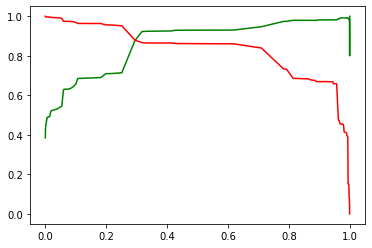

In [153]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

####  predictions on the test set

In [154]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [155]:
X_test = X_test[col2]
X_test.head()

,Do Not Email,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Neutral,Lead Quality_Worst,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
3271,0,0,0,0,0,0,0,1,0,1,0,0,0
1490,0,0,0,0,0,0,0,1,0,0,0,0,0
7936,0,0,0,0,0,0,0,1,0,1,0,0,0
4216,0,1,0,0,1,0,0,0,0,0,0,1,0
3830,0,0,0,0,0,0,0,1,0,1,0,0,0


In [156]:
X_test_sm = sm.add_constant(X_test)

In [157]:
y_test_pred = res.predict(X_test_sm)

In [158]:
y_test_pred[:10]

3271    0.251411
1490    0.957300
7936    0.251411
4216    0.999135
3830    0.251411
1800    0.957300
6507    0.100685
4821    0.000175
4223    0.997256
4714    0.294298
dtype: float64

In [159]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [160]:
# Let's see the head
y_pred_1.head()

,0
3271,0.251411
1490,0.957300
7936,0.251411
4216,0.999135
3830,0.251411


In [161]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [162]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [163]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [164]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [165]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.251411
1,1,1490,0.957300
2,0,7936,0.251411
3,1,4216,0.999135
4,0,3830,0.251411


In [166]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [167]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3271,0.251411
1,1,1490,0.957300
2,0,7936,0.251411
3,1,4216,0.999135
4,0,3830,0.251411


In [168]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)

In [169]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_predicted
0,0,3271,0.251411,1
1,1,1490,0.957300,1
2,0,7936,0.251411,1
3,1,4216,0.999135,1
4,0,3830,0.251411,1


In [170]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.811972089607051

In [171]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1288,  446],
       [  66,  923]], dtype=int64)

In [172]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [173]:
# sensitivity of our model
TP / float(TP+FN)

0.9332659251769464

In [174]:
# Let us calculate specificity
TN / float(TN+FP)

0.7427912341407151